 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [3]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns= Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [9]:
# Check Data Types
sp500_history_df.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$","")

sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

C:\Users\angel\AppData\Local\Temp/ipykernel_9736/826871138.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$","")


In [11]:
# Calculate Daily Returns
daily_returns = sp500_history_df.pct_change()


In [12]:
# Drop nulls
daily_returns.dropna(inplace=True)


In [13]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["Daily Returns"]
daily_returns.columns = columns
#Checking head to make sure code is working
daily_returns.head()


,Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns],axis="columns", join="inner")

In [15]:
#Make the data from past to present to keep orginized :)
combined_df.sort_index(inplace=True)


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all portfolios'}, xlabel='Date'>

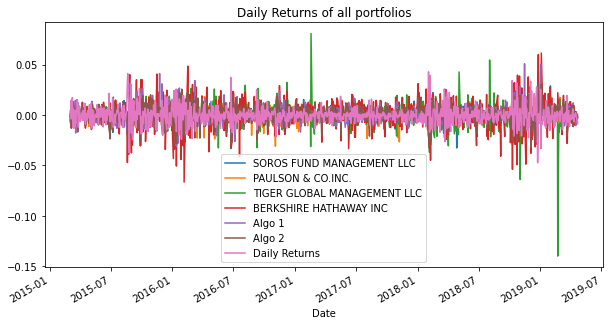

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,5), title="Daily Returns of all portfolios")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

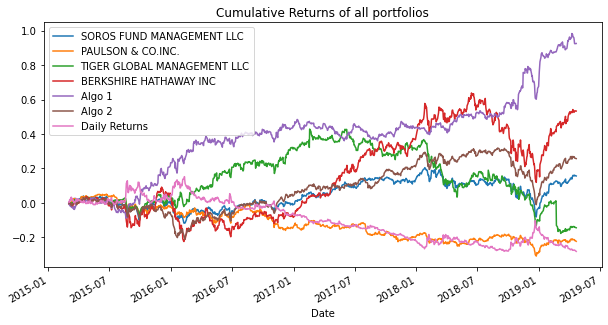

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of all portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

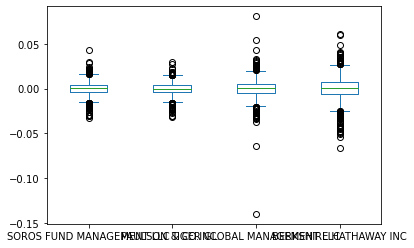

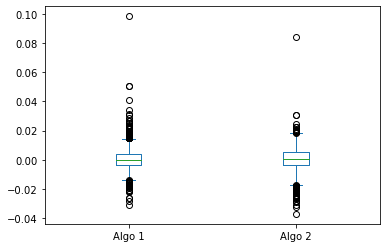

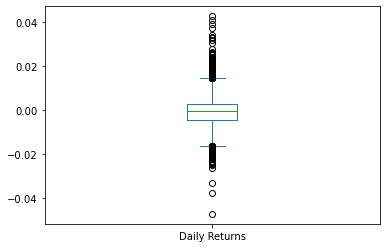

In [18]:
# Box plot to visually show risk
whale_df.plot.box()
algo_df.plot.box()
daily_returns.plot.box()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std_whale = whale_df.std()
daily_std_algo = algo_df.std()
daily_std_daily = daily_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
daily_std_daily = daily_returns.std()
daily_std_cumulative = cumulative_returns.std()

# Determine which portfolios are riskier than the S&P 500
daily_std_cumulative = daily_std_cumulative.sort_values(ascending=False)
#Checking head to make sure we have risk values
daily_std_cumulative.head()

BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 2                         0.131642
Daily Returns                  0.114846
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_cumulative * np.sqrt(252)


In [22]:
annualized_std.head()

BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 2                         2.089756
Daily Returns                  1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

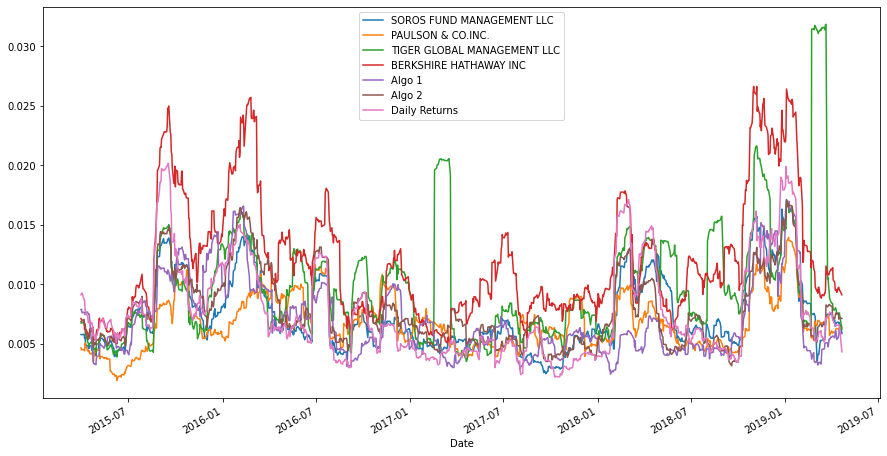

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
two_one_day_std_all = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(15,8))


### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

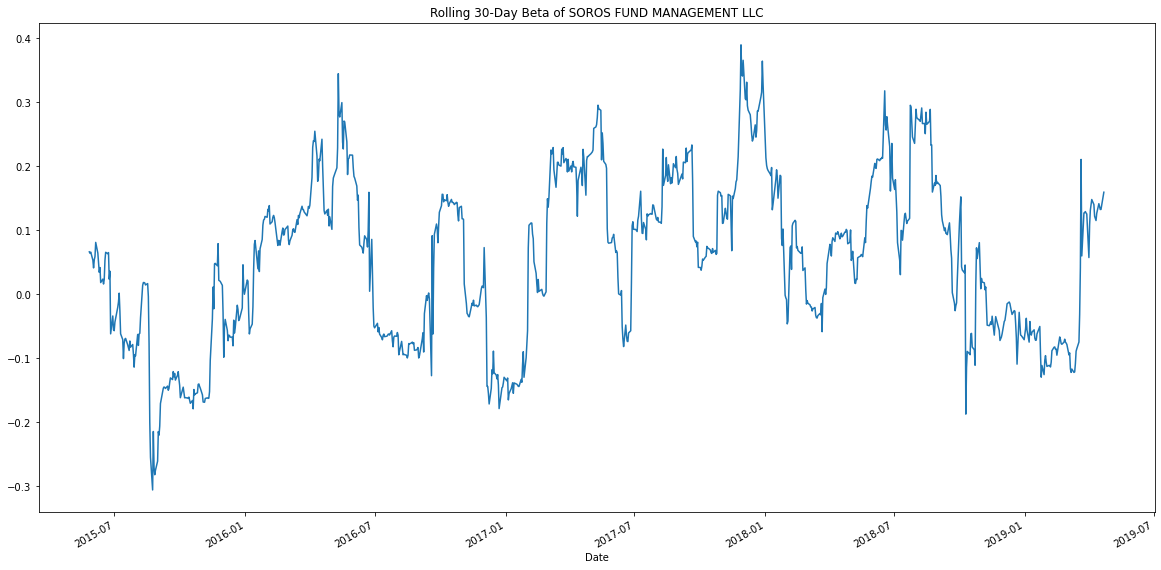

In [25]:
# Calculate covariance of a single portfolio
cov_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['Daily Returns'])

# Calculate variance of S&P 500
var_sp500 = combined_df['Daily Returns'].var()

# Computing beta
beta_soros = cov_soros /  var_sp500

#setting frmae for combined data
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['Daily Returns'])
rolling_variance = combined_df['Daily Returns'].rolling(window=60).var()

# Plot beta trend
rolling_beta_soros = rolling_covariance / rolling_variance
rolling_beta_soros.plot(figsize=(20, 10), title='Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

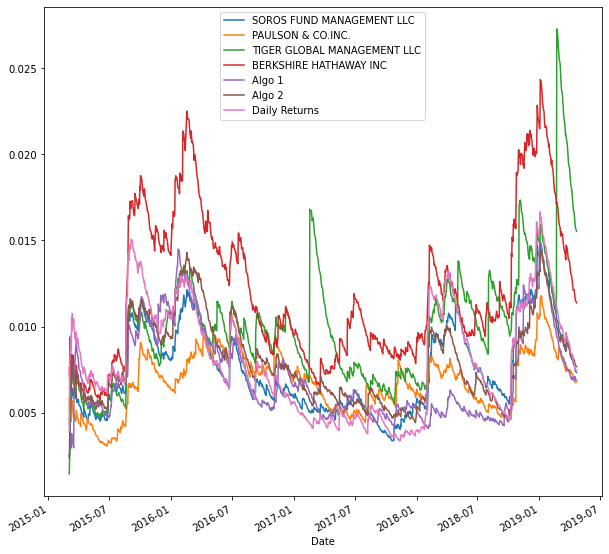

In [26]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(10,10))
#cumulative_returns = (1 + combined_df).cumprod() - 1
#cumulative_returns.plot(

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))


In [28]:
#see the table(Ratios)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Daily Returns                 -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

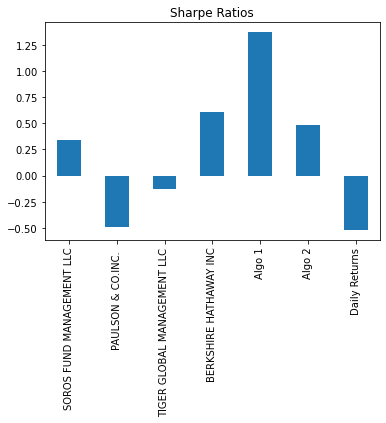

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outpurformed the market(S&P 500) and the whales portfolios from above


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
google_history = Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\goog_historical.csv")

In [31]:
# Reading data from 2nd stock
apple_history = Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\aapl_historical.csv")

In [32]:
# Reading data from 3rd stock
cost_history =Path("C:\\Users\\angel\\OneDrive\\Desktop\\FinTech\\Pandas_hw\\Pandas_Portfolio\\Resources\\cost_historical.csv")

In [33]:
#creating data frames from info
aapl_df = pd.read_csv(google_history, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df = pd.read_csv(apple_history, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df = pd.read_csv(cost_history, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [34]:
#changing column to Stock Ticker Symbol
aapl_df.rename( columns={"NOCP":"AAPL"},inplace = True )
cost_df.rename( columns={"NOCP":"COST"},inplace = True )
goog_df.rename( columns={"NOCP":"GOOG"},inplace = True )

In [35]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([aapl_df, cost_df, goog_df],axis="columns", join="inner")


In [36]:
# Reset Date index
combined_custom_df.sort_index(inplace=True)


In [37]:
# Reorganize portfolio data by having a column per symbol
combined_custom_df.drop(columns=['Symbol'], axis=1,inplace = True)


In [38]:
# Calculate daily returns
daily_returns_custom = combined_custom_df.pct_change()
daily_returns_custom.head()
# Drop NAs
daily_returns_custom.dropna(inplace=True)

# Display sample data
daily_returns_custom.head()


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns_custom.dot(weights)

# Display sample data
portfolio_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
combined_custom = pd.concat([portfolio_return, combined_df], axis='columns', join='inner')


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_custom.dropna(inplace=True)


In [42]:
# Past to present dates
combined_custom.sort_index(inplace=True)


In [43]:
# Renaming column so it doesnt appear as 0
combined_custom.rename(columns= {0: "Portfolio"},inplace = True )


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
combined_custom.std()
annualized_variance_custom = (combined_custom.var()*252)
annualized_std_custom = np.sqrt(annualized_variance_custom)
annualized_std_custom

Portfolio                      0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
Daily Returns                  0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

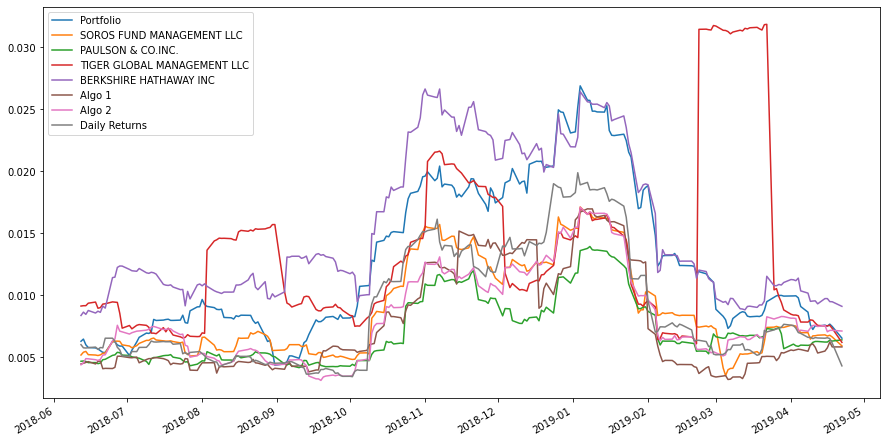

In [45]:
# Calculate rolling standard deviation, Plot rolling standard deviation
combined_custom.rolling(window=21).std().plot(figsize=(15,8))



### Calculate and plot the correlation

In [46]:
# Calculate and plot the correlation
correlation_custom = combined_custom.corr()
correlation_custom


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Portfolio,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
Daily Returns,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


<AxesSubplot:>

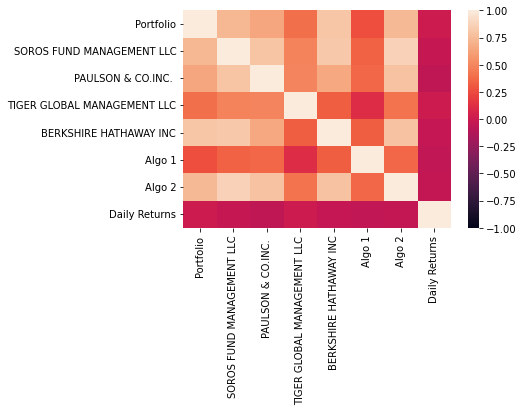

In [47]:
#(Plot)
sns.heatmap(correlation_custom, vmin=-1, vmax=1,)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_final = (combined_custom.mean() * 252) / ((combined_custom).std() * np.sqrt(252))
sharpe_ratios_final

Portfolio                      0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
Daily Returns                 -0.427676
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

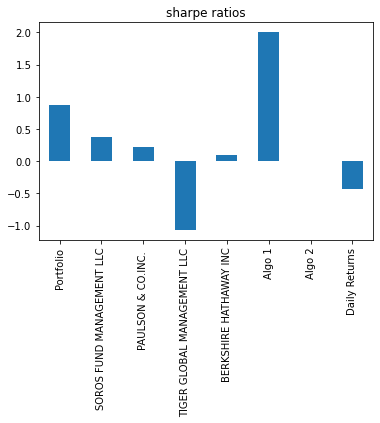

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot(kind="bar", title="sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [50]:
print("Portfolio did good but didnt outperform the first Algorithm it stayed slightly above the rest throughout the whole time")

Portfolio did good but didnt outperform the first Algorithm it stayed slightly above the rest throughout the whole time
